## Introduction to Monte Carlo Simulations (01/23)

* In real-world applications, we typically have a dataset corresponding to a random sample from a well-defined population of which we DON'T know the parameters. However, we can use use a single random sample to estimate them.
* It may sound circular but, to generate the appropriate random sample, we must know the population parameters? After simulating the random sample, we can apply estimators to the to estimate the population parameters. 

**Steps**:
1. Select a population distribution and its parameters 
2. Generate a random sample from the distribution
3. Use the random sample to estimate the population parameters

* The random sample gives us a "noisy" estimate of something we know precisely. How does that make sense? Answer: by estimating something we already know, we can study the behavior of our estimator 

* In the near future, when performing a MC simulation, we first need to select the statistical model to use for the simulation. The model is then fed with a multitude of random inputs from a selected statistical probability distribution: the independent variables Xs in the model are assigned random values and the dependent variable Y is calculated by the model. This process is repeated many many times. Each run represents a MC simulation. We end up with many different values of Y, one for each different set of random values of the Xs. We then plot the Y output results, using a histogram, to either see the most frequent Y result and/or take all the Ys and average them together to get a single average Y. 

* Running MC simulations helps us see the effects of real-world variability of inputs on the outcomes. We don't have just one set of inputs for our model but a whole range. Having an underlying model and knowing the input variability, we can see the spread of the possible outputs, i.e. the sort of pattern or distribution of outcomes produced.

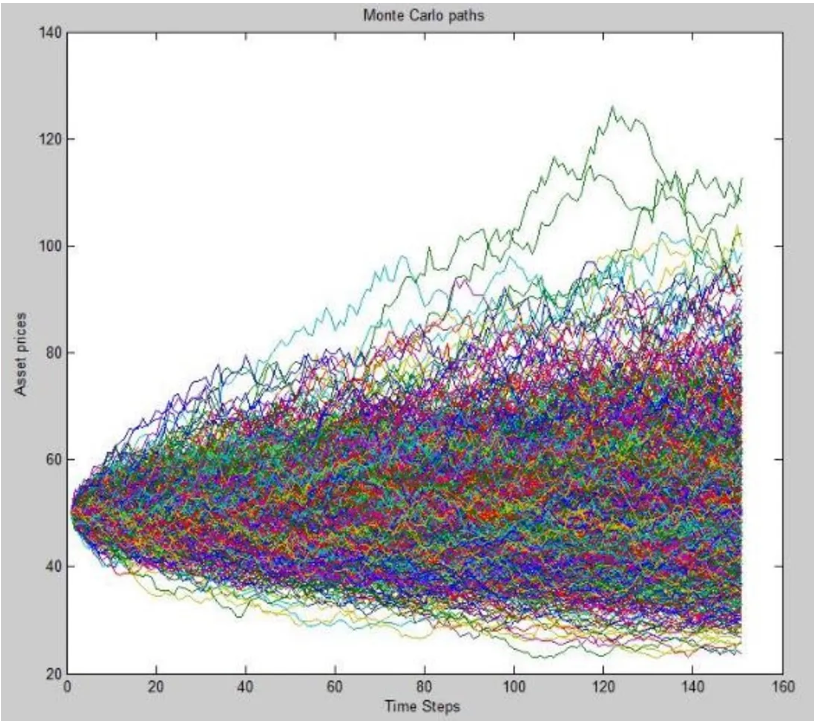

## Code

#### Example 01

In [18]:
# Dependencies
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
# set random seed:
np.random.seed(123456)

# set sample size:
n = 100

# draw a random sample (100 elements) given the population parameters:
sample1 = stats.norm.rvs(10, 2, size=n)

In [15]:
# estimate the population mean with the sample average:
estimate1 = np.mean(sample1)
print(f'estimate1: {estimate1}\n')

# draw a different sample and estimate again:
sample2 = stats.norm.rvs(10, 2, size=n)
estimate2 = np.mean(sample2)
print(f'estimate2: {estimate2}\n')

# draw a third sample and estimate again:
sample3 = stats.norm.rvs(10, 2, size=n)
estimate3 = np.mean(sample3)
print(f'estimate3: {estimate3}\n')

estimate1: 9.573602656614304

estimate2: 10.24798129790092

estimate3: 9.96021755398913



#### Example 02

In [19]:
# set random seed:
np.random.seed(123456)

# set sample size:
n = 100

# initialize ybar to an array of length r=10000 to later store results:
r = 10000
ybar = np.empty(r)

# repeat r times:
for j in range(r):
    # draw a sample and store the sample mean in pos. j=0,1,... of ybar:
    sample = stats.norm.rvs(10, 2, size=n)
    ybar[j] = np.mean(sample)

## Results

* Remember that the sampling distribution of the sample means has its own mean (equal to population mean $\mu$ and standard deviation (called standard error) or variance equal to $\frac{\sigma^2} {n}$.

ybar[0:19]: 
[ 9.57360266 10.2479813   9.96021755  9.67635967  9.82261605  9.6270579
 10.02979223 10.15400282 10.28812728  9.69935763 10.41950951 10.07993562
  9.75764232 10.10504699  9.99813607  9.92113688  9.55713599 10.01404669
 10.25550724]

np.mean(ybar): 10.00082418067469

np.var(ybar, ddof=1): 0.03989666893894718



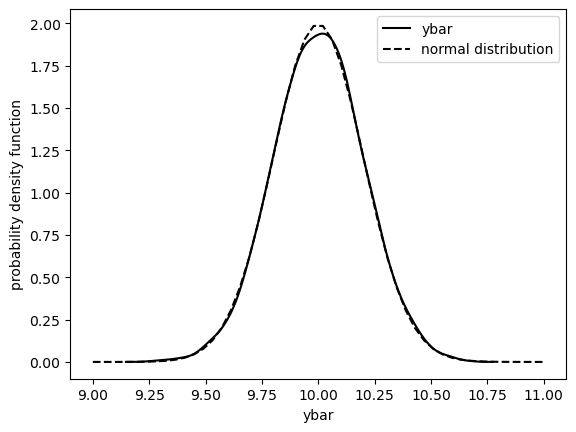

In [22]:
# the first 20 of 10000 estimates:
print(f'ybar[0:19]: \n{ybar[0:19]}\n')

# simulated mean:
print(f'np.mean(ybar): {np.mean(ybar)}\n')

# simulated variance:
print(f'np.var(ybar, ddof=1): {np.var(ybar, ddof=1)}\n')

# simulated density:
kde = sm.nonparametric.KDEUnivariate(ybar)
kde.fit()

# Theoretical normal density:
x_range = np.linspace(9, 11)
y = stats.norm.pdf(x_range, 10, np.sqrt(0.04))

# create a graph (frequency distribution) of the sample means.
#It should be a normal distribution.

plt.plot(kde.support, kde.density, color='black', label='ybar')
plt.plot(x_range, y, linestyle='--', color='black', label='normal distribution')
plt.ylabel('probability density function')
plt.xlabel('ybar')
plt.legend()
plt.show()

## Summary

* Simulation results confirm the theoretical results: mean, variance,  density are very close to theory. Differences are due to the fact that we “only” used 10 000 samples.